In [1]:
'''
mongodb 에서 review 데이터 load
명사분리, count
KOSAC 감성사전, sentimental
'''

'\nmongodb 에서 review 데이터 load\n명사분리, count\nKOSAC 감성사전, sentimental \n'

In [1]:
import pymongo
import json

In [2]:
connection = pymongo.MongoClient('localhost', 27017)
db = connection.test
collection = db.test_collection2

In [41]:
data = list(collection.find({},{'_id':False, 'comments':True, 'score':True}))

In [42]:
reviews = []
for row in data:
    reviews.append(row)

print(reviews[:10])

[{'comments': '두말하면 잔소리지요\n세번째구매해서이미 먹고있는중입니다\n설선물이벤트도 하던데 쟁여놀까싶네요', 'score': 5}, {'comments': '은근 맛이 강해서 놀랐음 복숭아맛좋아해서 샀는데 레몬 사야겟어요 달다가 새콤하니 이상하네요 포카리보다 맛강해야', 'score': 4}, {'comments': '먹어도 효과는 없어요', 'score': 3}, {'comments': '물만마시면 화장실바로가는데\n링티는 몸에 쏵흡수되는 느낌이네요', 'score': 5}, {'comments': '아들이 운동시 들어서 사달라고 해서 구매했는데 복숭아향이 은은하게 나면서 맛있고 피로회복에 도움이 된다고 하네요', 'score': 5}, {'comments': '배송빠르고 만족해요', 'score': 5}, {'comments': '복숭아맛만 먹다가 레몬맛 첨 시켰습니다\n맛 괜찮지만 갠적으로 복숭아맛이 더 나은듯\n배송빨랐어요', 'score': 5}, {'comments': '이온음료 보다는 확실히 좋은듯 \n술 먹고 다음날 먹으면 최고', 'score': 5}, {'comments': '먹기 편하게 포장되어 있어요  맛있는 건 아니지만 먹기에 적당한 맛이에요', 'score': 4}, {'comments': '포카리스웨터가루먹는것보다효과가없다하네요', 'score': 2}]


### 키워드

In [30]:
from konlpy.tag import Twitter
from collections import Counter
from pprint import pprint

In [5]:
twitter = Twitter()

C:\Users\mediance_ssh\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [179]:
def scoreNOM(score):
    result = score
    if score == 2 :
        result = 1
    elif score == 4 :
        result = 5
    return result

In [181]:
tokens = [pos+(scoreNOM(review['score']),) for review in reviews for pos in twitter.pos(review['comments'])]
print(tokens[:10])

[('두', 'Determiner', 5), ('말', 'Noun', 5), ('하', 'Suffix', 5), ('면', 'Josa', 5), ('잔소리', 'Noun', 5), ('지', 'Josa', 5), ('요', 'Noun', 5), ('\n', 'Foreign', 5), ('세번', 'Noun', 5), ('째', 'Suffix', 5)]


In [194]:
def countedScore(counter,score):
    counter = {word:freq for word, freq in counter.items() if(freq>=4) and (len(word[0])>1) and (word[1]=='Noun') and (word[2]==score)}    
    return sorted(counter.items(), key=lambda x:x[1], reverse=True)

In [198]:
counter = Counter(tokens)
# result = []
# for word, freq in counter.items():
#     if (freq >= 4) and (word[1])=='Noun':
#         result.append({word:freq})
# print(result[:10])        

'''
1글자이상, 최소4번등장, 1~5 -> 1,3,5로 표준화, 명사/형용사 
'''
counted1 = countedScore(counter,1)
counted3 = countedScore(counter,3)
counted5 = countedScore(counter,5)

pprint(counted1[:10])

[(('효과', 'Noun', 1), 80),
 (('그냥', 'Noun', 1), 25),
 (('대장', 'Noun', 1), 18),
 (('음료', 'Noun', 1), 15),
 (('내시경', 'Noun', 1), 15),
 (('복숭아', 'Noun', 1), 14),
 (('생각', 'Noun', 1), 13),
 (('느낌', 'Noun', 1), 13),
 (('별로', 'Noun', 1), 12),
 (('피로', 'Noun', 1), 12)]


In [210]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [240]:
mpl.rc('font',family='NanumGothic')
# fig = plt.figure(figsize=(15,15),)

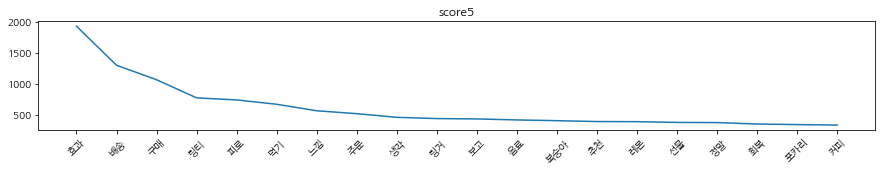

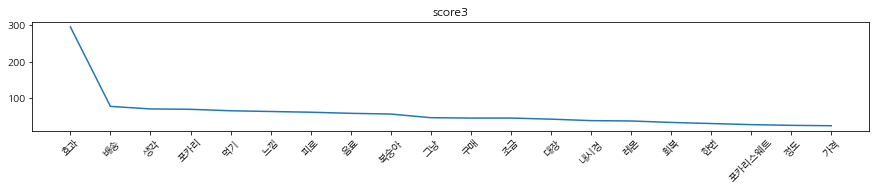

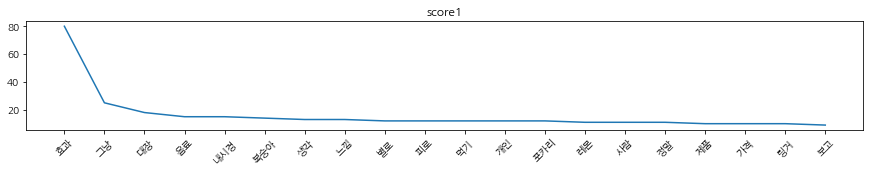

In [258]:
# ax1 = plt.subplot2grid((3,1), (0,0),)
# ax2 = plt.subplot2grid((3,1), (1,0),)
# ax3 = plt.subplot2grid((3,1), (2,0),)



word_item, count_list = zip(*counted5[:20])
words, pos, score = zip(*word_item)
plt.figure(figsize=(15,2))
plt.title('score5')
plt.xticks(rotation=45)
plt.plot(words, count_list)
plt.show()

word_item, count_list = zip(*counted3[:20])
words, pos, score = zip(*word_item)
plt.figure(figsize=(15,2))
plt.title('score3')
plt.xticks(rotation=45)
plt.plot(words, count_list)
plt.show()

word_item, count_list = zip(*counted1[:20])
words, pos, score = zip(*word_item)
plt.figure(figsize=(15,2))
plt.title('score1')
plt.xticks(rotation=45)
plt.plot(words, count_list)
plt.show()


### 감성분석